In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# from statannotations.Annotator import Annotator #https://github.com/trevismd/statannotations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDown.py', '../models/SimplifierBottomUp.py', '../models/Vanilla.py'] ['Simplifier Top Down', 'Simplifier Bottom Up', 'Without simplification']
(83, 14)
['Simplifier Top Down' 'Simplifier Bottom Up' 'Without simplification']
['Concrete']
range(1, 5)


In [2]:
all_data = []
for i, row in results_df.iterrows():
    model, dataset, random_state = row.loc[['model', 'dataset', 'random_state']]

    files = glob(f"{results_path}/{dnames_to_ugly[dataset]}/{nice_to_ugly[model]}/"
                f"*{random_state}_evolution.csv")

    for file in files:
        data = pd.read_csv(file)
        
        for gen in gens:
            try:
                row = data[data['gen']==gen].iloc[0] # should have just 1 row
            except Exception as e:
                pass
                # print(e)
                # print(file, gen)
                # print(row)

            all_data.append((model, dataset, *row))
            
all_data_df = pd.DataFrame(all_data, 
                           columns=(
                               'model',
                               'dataset',
                               *row.index
                           ))

all_data_df = all_data_df.replace([np.inf, -np.inf], np.nan).dropna()

print(all_data_df.shape)
print(all_data_df['model'].unique())
print(all_data_df['dataset'].unique())
all_data_df.sample(5)

(269, 27)
['Simplifier Top Down' 'Simplifier Bottom Up' 'Without simplification']
['Concrete']


,model,dataset,gen,evals,best_size,n_simplifications,n_new_hashes,avg train error,avg train size,avg val error,...,std val error,std val size,min train error,min train size,min val error,min val size,max train error,max train size,max val error,max val size
330,Without simplification,Concrete,3.0,12.0,3.0,0.0,0.0,1.089479e+03,24.000000,1.126143e+03,...,2.778512e+02,12.124356,274.527943,3.0,306.589338,3.0,1.415016e+03,31.0,1.482136e+03,31.0
223,Simplifier Bottom Up,Concrete,4.0,12.0,4.0,10.0,9.0,7.263541e+03,3.916667,7.385067e+03,...,1.947904e+04,2.019007,272.945319,2.0,274.425862,2.0,6.957901e+04,10.0,7.164695e+04,10.0
32,Simplifier Top Down,Concrete,1.0,12.0,9.0,30.0,24.0,1.795646e+07,10.166667,1.801372e+07,...,5.860290e+07,5.257270,1385.309879,6.0,1368.293562,6.0,2.125992e+08,23.0,2.123637e+08,23.0
22,Simplifier Top Down,Concrete,3.0,12.0,5.0,13.0,2.0,1.455013e+03,5.500000,1.375685e+03,...,2.959873e+02,0.957427,416.402606,5.0,443.226312,5.0,1.601050e+03,8.0,1.511532e+03,8.0
30,Simplifier Top Down,Concrete,3.0,12.0,7.0,22.0,6.0,6.749518e+02,6.750000,6.392107e+02,...,3.651238e+02,1.010363,338.766662,5.0,262.278154,5.0,1.294185e+03,9.0,1.281898e+03,9.0


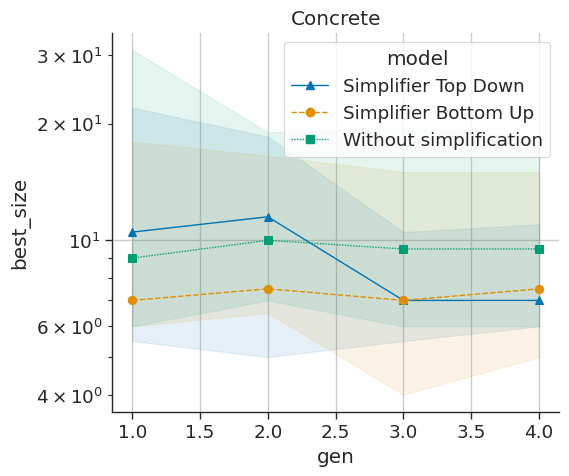

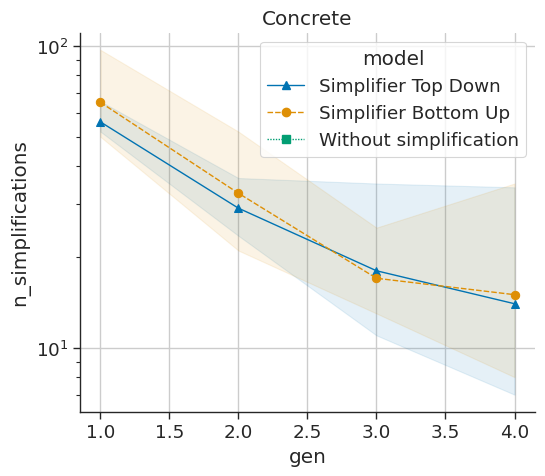

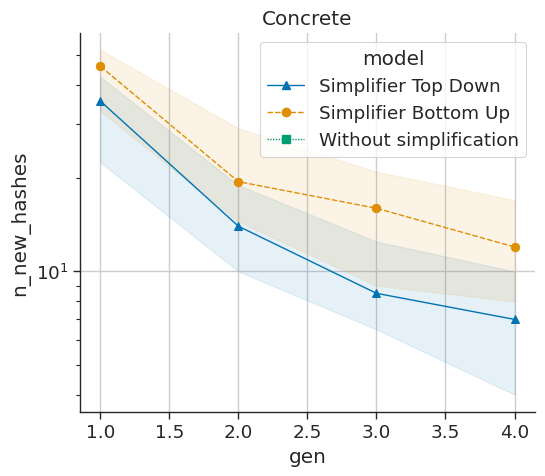

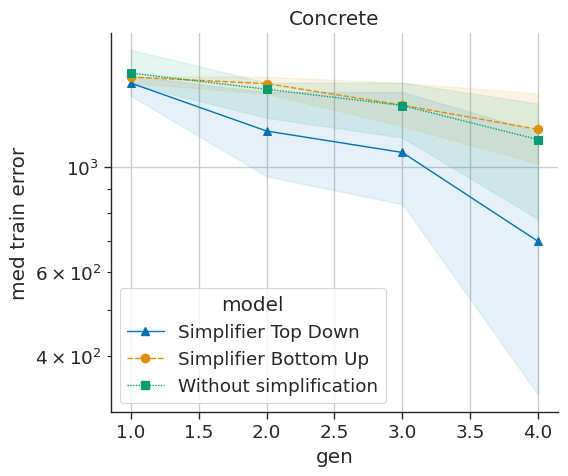

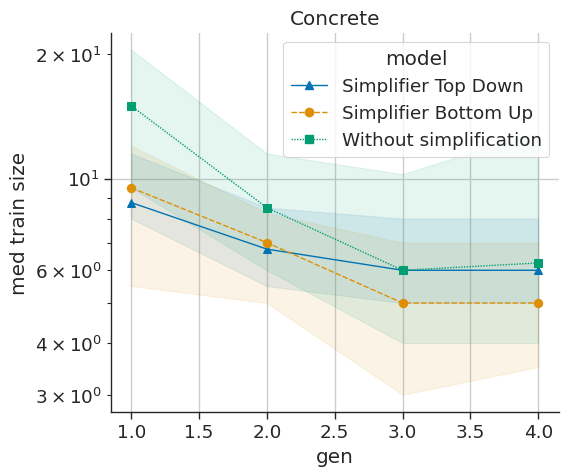

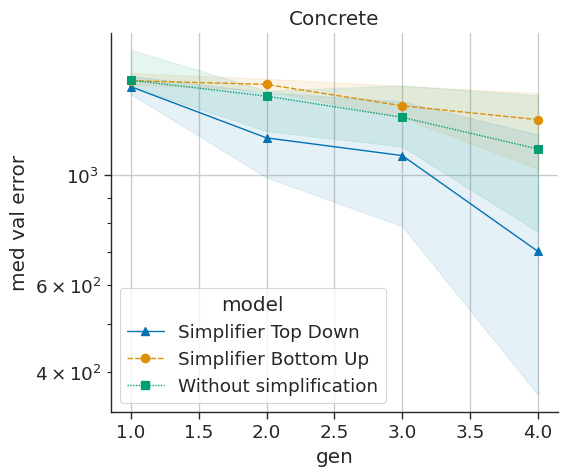

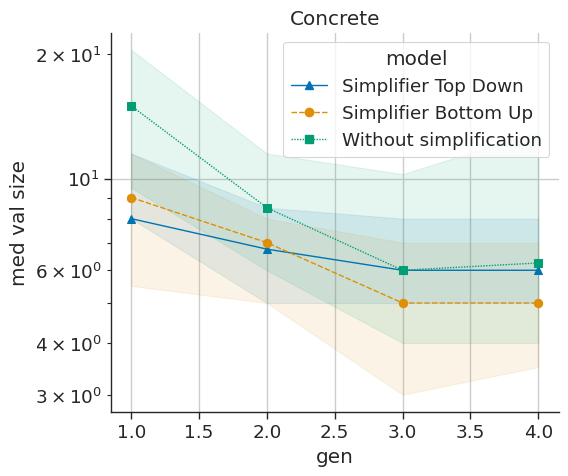

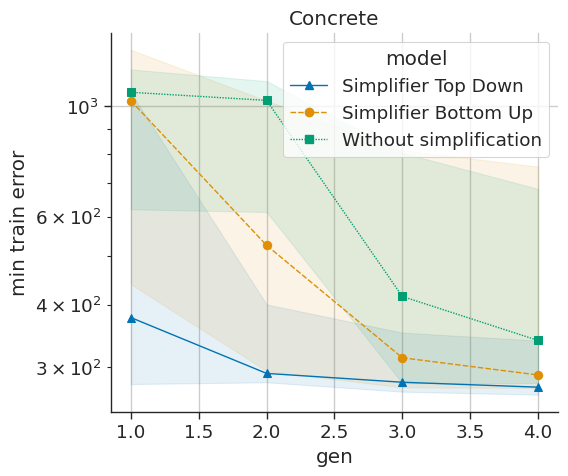

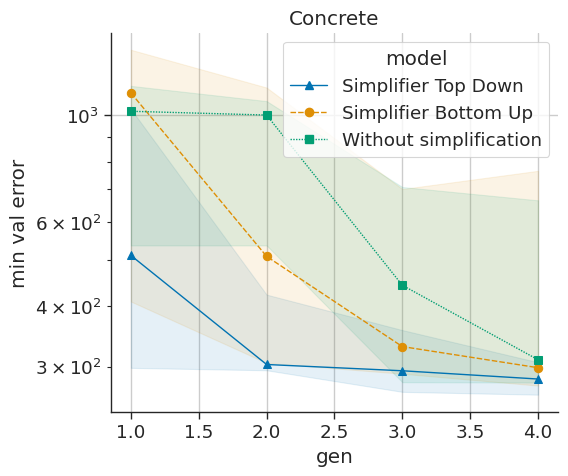

In [3]:
for col in [
    'best_size','n_simplifications','n_new_hashes','med train error','med train size',
    'med val error','med val size','min train error','min val error'
]:
    
    # about errors: https://seaborn.pydata.org/tutorial/error_bars.html
    g = sns.relplot(
        data=all_data_df,
        x="gen", y=col, col="dataset", hue="model",
        style="model", col_wrap=4, markers=marker_choice, markeredgecolor=None, 
        kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, #errorbar=None, #('ci', 50),
        hue_order = order, estimator=np.median, markersize=6,
        
        # err_style='bars', err_kws={'capsize':2.0, 'linewidth':0.75},
        err_style='band', err_kws={'alpha':0.1},
    )
    g.set_titles("{col_name}")

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='both', linewidth=1)

    if True: # use log scale
        #g.set(xscale="log")
        g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{col}.pdf")
    plt.savefig(f"../paper/figs/{col}.png")
    plt.show()